In [1]:
from glob import glob
from typing import List

In [2]:
def load_texts(paths: List[str]) -> List[str]:
    texts = []
    for p in paths:
        with open(p, 'rt') as f:
            text = f.read()
            texts.append(text)
    return texts

In [3]:
it_paths = glob('text/it-life-hack/*.txt')
it_texts = load_texts(it_paths)

In [45]:
import math

import pandas as pd
import spacy
from tqdm import tqdm

In [27]:
nlp = spacy.blank("ja")

In [32]:
words = []
for text in tqdm(it_texts):
    for word in nlp(text):
        words.append(word.lemma_)
len(words)

100%|██████████| 871/871 [02:16<00:00,  6.38it/s]


669754

In [47]:
freq_df = pd.Series(words).value_counts().reset_index()
freq_df.columns = ['word', 'frequency']
freq_df['rank'] = [i for i in range(1, freq_df.shape[0]+1)]
freq_df['log_frequency'] = freq_df.frequency.apply(math.log)
freq_df['log_rank'] = freq_df['rank'].apply(math.log)
freq_df.shape

(18179, 5)

In [48]:
freq_df

,word,frequency,rank,log_frequency,log_rank
0,の,27394,1,10.218079,0.000000
1,、,22179,2,10.006901,0.693147
2,する,18073,3,9.802174,1.098612
3,を,17843,4,9.789367,1.386294
4,だ,16880,5,9.733885,1.609438
...,...,...,...,...,...
18174,ディスプレ,1,18175,0.000000,9.807802
18175,cafe,1,18176,0.000000,9.807857
18176,ノースリーブス,1,18177,0.000000,9.807912
18177,肩叩き,1,18178,0.000000,9.807967


In [52]:
import matplotlib.pyplot as plt

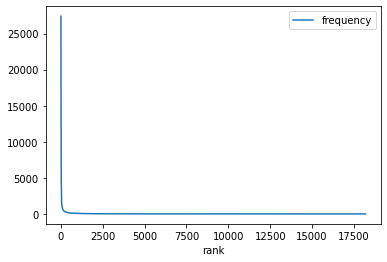

In [53]:
freq_df.plot(x='rank', y='frequency')
plt.show()

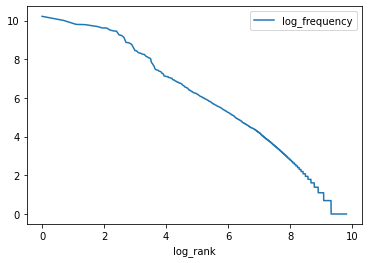

In [55]:
freq_df.plot(x='log_rank', y='log_frequency')
plt.show()